In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import explore
import prepare
import unicodedata
import nltk

import re

from wordcloud import WordCloud


# Elements of Exploration

1. Length of repository in words
2. unique words to a language
3. HTML reference tags (a, href, img)
4. repeated words

php - targetblankimg

# Manipulating dataframe and feature engineering

1. List of words from df
2. Series of list from DF

# Visualizations!!!!!

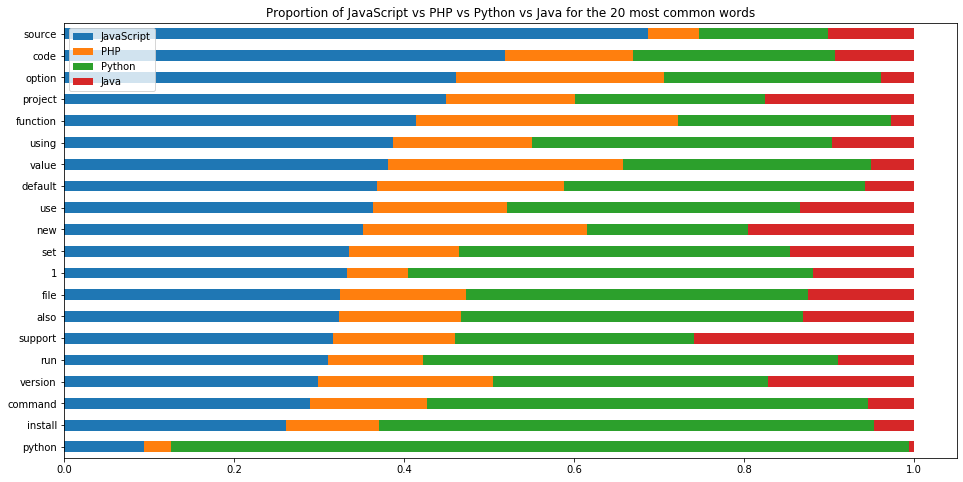

In [12]:
word_counts = explore.get_word_count(df)
explore.viz_most_common(word_counts)

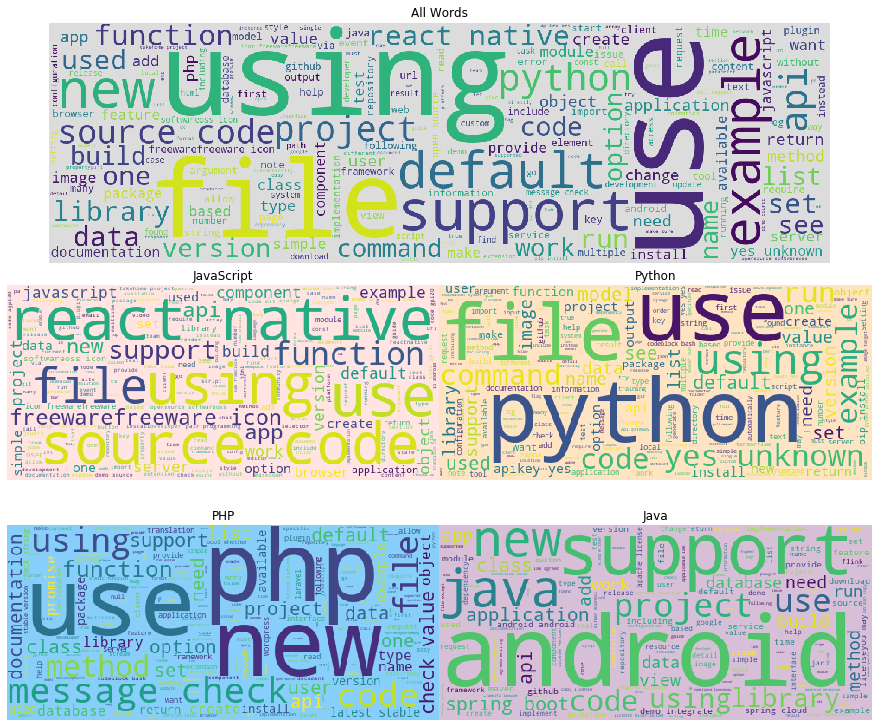

In [14]:
explore.get_single_word_cloud(df)

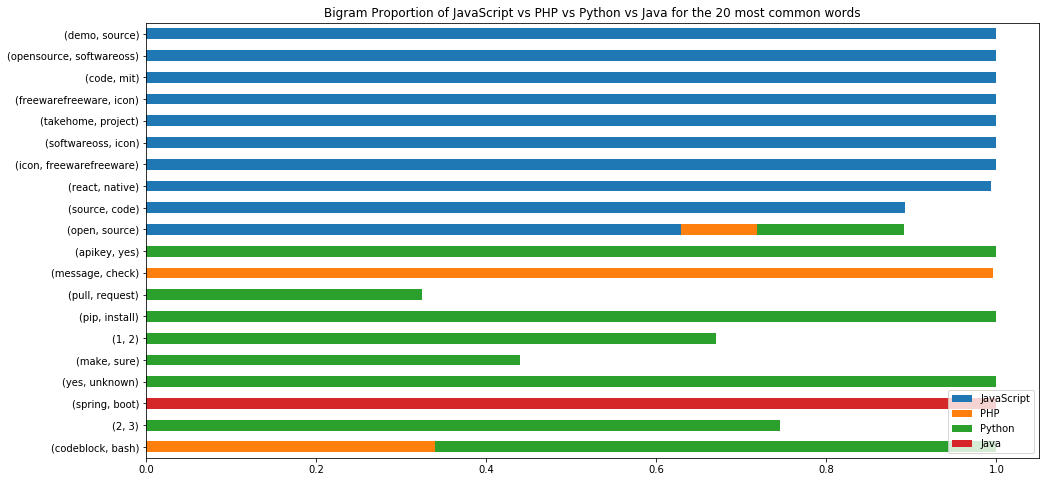

In [20]:
bigram_word_counts = explore.top_twenty_bigrams(df)
explore.viz_top_bigram(bigram_word_counts)